In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train, train_label), (test, test_label) = reuters.load_data(num_words=10000)

-------------------------------------------------------------------------------------------------------------------------

In [28]:
train_label

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [5]:
len(train)

8982

In [6]:
len(test)

2246

In [7]:
train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
decoding

In [16]:
word_index = reuters.get_word_index()
reversed_wordindex = dict([(v,k) for k, v in word_index.items()])

In [20]:
decoded_newswire = ' '.join([reversed_wordindex.get(i - 3, '?') for i in train[0]])

In [21]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
train_label[0]

3

-------------------------------------------------------------------------------------------------------------------------------

preparing data

In [7]:
import numpy as np

def vectorize(data, dimension = 10000):
    result = np.zeros((len(data),dimension)) # train: 8982, 10000 / test: 2246, 10000
    for i, sequence in enumerate(data):
        result[i, sequence] = 1
        return result
xtrain = vectorize(train)
xtest = vectorize(test)

In [11]:
display(xtrain[0])

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
from tensorflow.keras.utils import to_categorical

x1 = to_categorical(train)
x2 = to_categorical(test)

x1

ValueError: setting an array element with a sequence.

one hot encode labels as well

In [13]:
"""def onehot(labels, dimension = 46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i,label] = 1
        return result
ytrain = onehot(train_label)
ylabel = onehot(test_label)"""

from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(train_label)
ytest = to_categorical(test_label)

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [40]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [41]:
xval = xtrain[:1000]
partial_xtrain = xtrain[1000:]

yval = ytrain[:1000]
partial_ytrain = ytrain[1000:]

In [42]:
history = model.fit(partial_xtrain, partial_ytrain,
epochs=20,
batch_size=512,
validation_data=(xval, yval))

Epoch 1/20
16/16 [==============================] - 3s 163ms/step - loss: 3.8119 - accuracy: 0.0682 - val_loss: 3.7980 - val_accuracy: 0.0470
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 3.7881 - accuracy: 0.0834 - val_loss: 3.7770 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 3.7676 - accuracy: 0.2945 - val_loss: 3.7570 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 1s 67ms/step - loss: 3.7477 - accuracy: 0.3514 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 1s 67ms/step - loss: 3.7280 - accuracy: 0.3514 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 1s 79ms/step - loss: 3.7084 - accuracy: 0.3514 - val_loss: 3.6984 - val_accuracy: 0.3530
Epoch 7/20
16/16 [==============================] - 1s 90ms/step - loss: 3.6891 - accuracy: 0.3514 - val_loss: 3.6791 - val_accuracy: 0.3530
Epoch 8/20
1

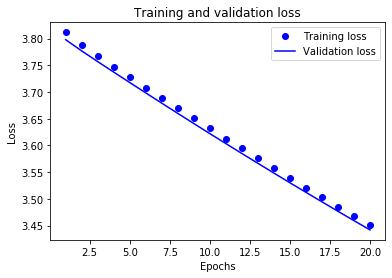

In [50]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

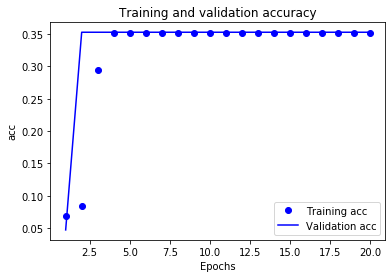

In [51]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()